# 상권 데이터 EDA(탐색적 데이터 분석)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CA = pd.read_csv('./2021_commercialarea.csv',encoding='utf-8')

In [3]:
#사용할 컬럼만 가져오기

cols = ['상권_코드_명', '분기당_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', 
        '연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']

col2 = CA.loc[:,cols]
col2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192640 entries, 0 to 192639
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   상권_코드_명          192640 non-null  object 
 1   분기당_매출_건수        192639 non-null  float64
 2   연령대_10_매출_건수     192639 non-null  float64
 3   연령대_20_매출_건수     192639 non-null  float64
 4   연령대_30_매출_건수     192639 non-null  float64
 5   연령대_40_매출_건수     192639 non-null  float64
 6   연령대_50_매출_건수     192639 non-null  float64
 7   연령대_60_이상_매출_건수  190886 non-null  float64
dtypes: float64(7), object(1)
memory usage: 11.8+ MB


In [4]:
#강남 지역 데이터만 사용하기

city = col2[col2['상권_코드_명'].str.contains('강남')]

In [5]:
city

,상권_코드_명,분기당_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
606,강남대로118길,23.0,0.0,0.0,23.0,0.0,0.0,0.0
1355,강남대로23길,60.0,0.0,0.0,0.0,12.0,36.0,12.0
1356,강남대로23길,537.0,0.0,0.0,0.0,358.0,179.0,0.0
1357,강남대로34길,19.0,0.0,0.0,0.0,19.0,0.0,0.0
1358,강남대로8길,208.0,0.0,0.0,0.0,0.0,0.0,208.0
...,...,...,...,...,...,...,...,...
188891,강남대로34길,2036.0,0.0,0.0,0.0,0.0,1097.0,470.0
188911,강남대로118길,93.0,0.0,0.0,13.0,80.0,0.0,0.0
188912,강남대로118길,1378.0,0.0,289.0,271.0,246.0,316.0,256.0
188913,강남대로136길,128.0,0.0,0.0,0.0,128.0,0.0,0.0


In [6]:
#결측치 확인

city.isnull().sum()

상권_코드_명            0
분기당_매출_건수          0
연령대_10_매출_건수       0
연령대_20_매출_건수       0
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
dtype: int64

In [7]:
# 열 이름을 편하게 변경 후
#상권 코드명을 인덱스로 설정

city.columns = ['City','Sales_per_quarter','Sales_10','Sales_20','Sales_30','Sales_40','Sales_50','Sales_over_60']
city1 = city.set_index('City')

In [8]:
city1

,Sales_per_quarter,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
City,,,,,,,
강남대로118길,23.0,0.0,0.0,23.0,0.0,0.0,0.0
강남대로23길,60.0,0.0,0.0,0.0,12.0,36.0,12.0
강남대로23길,537.0,0.0,0.0,0.0,358.0,179.0,0.0
강남대로34길,19.0,0.0,0.0,0.0,19.0,0.0,0.0
강남대로8길,208.0,0.0,0.0,0.0,0.0,0.0,208.0
...,...,...,...,...,...,...,...
강남대로34길,2036.0,0.0,0.0,0.0,0.0,1097.0,470.0
강남대로118길,93.0,0.0,0.0,13.0,80.0,0.0,0.0
강남대로118길,1378.0,0.0,289.0,271.0,246.0,316.0,256.0


In [9]:
city1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 강남대로118길 to 강남대로136길
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_per_quarter  1126 non-null   float64
 1   Sales_10           1126 non-null   float64
 2   Sales_20           1126 non-null   float64
 3   Sales_30           1126 non-null   float64
 4   Sales_40           1126 non-null   float64
 5   Sales_50           1126 non-null   float64
 6   Sales_over_60      1126 non-null   float64
dtypes: float64(7)
memory usage: 70.4+ KB


In [10]:
#기술 통계량

city1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_per_quarter,1126.0,51249.258437,141890.736086,6.0,1097.75,6318.5,26003.25,1154533.0
Sales_10,1126.0,460.643872,1772.458882,0.0,0.00,10.0,182.00,25463.0
Sales_20,1126.0,11559.351687,37676.205387,0.0,120.00,682.5,5230.75,365799.0
Sales_30,1126.0,13305.870337,40366.178342,0.0,206.50,1169.0,6291.75,351726.0
Sales_40,1126.0,9529.473357,26228.105257,0.0,223.50,1283.5,4575.75,205891.0
Sales_50,1126.0,7193.358792,19402.891172,0.0,142.00,990.0,4115.50,209085.0
Sales_over_60,1126.0,5343.358792,18451.213148,0.0,75.00,596.0,2997.00,274251.0


In [11]:
# 적절한 타입으로 변환시켜 용량 줄이기

city1 = city1.astype({'Sales_per_quarter':'int32',                      
                      'Sales_10':'int32',
                      'Sales_20':'int32',
                      'Sales_30':'int32',
                      'Sales_40':'int32',
                      'Sales_50':'int32',
                      'Sales_over_60':'int32'})

In [12]:
city1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 강남대로118길 to 강남대로136길
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales_per_quarter  1126 non-null   int32
 1   Sales_10           1126 non-null   int32
 2   Sales_20           1126 non-null   int32
 3   Sales_30           1126 non-null   int32
 4   Sales_40           1126 non-null   int32
 5   Sales_50           1126 non-null   int32
 6   Sales_over_60      1126 non-null   int32
dtypes: int32(7)
memory usage: 39.6+ KB


In [13]:
# 중복되는 city는 상위 1개를 남기고 제거

city2 = city1.sort_values(by='Sales_per_quarter' ,ascending=False)
city2 = city2.loc[~city2.index.duplicated(keep='first')]

In [14]:
# 분기별 매출 상위 10개 추출

city3 = city2.sort_values('Sales_per_quarter', ascending=False).head(10)
city3

,Sales_per_quarter,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
City,,,,,,,
강남대로140길,1154533,17725,359309,351726,195720,132822,48655
강남대로118길,1022423,1883,124268,181522,200717,209085,274251
강남대로34길,872671,7263,210724,268555,189111,111631,52317
강남대로136길,830862,10148,253368,269293,149117,91267,33005
강남대로23길,551115,3347,138291,182440,114492,66540,31873
강남대로8길,305611,1075,23834,53751,49739,62187,74817


<BarContainer object of 6 artists>

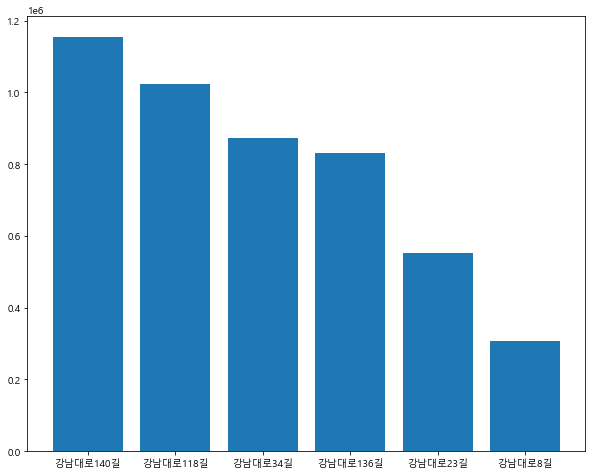

In [15]:
# 분기당 매출 상위 10개 지역 시각화

import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

x=city3.index.to_list()
y=city3.Sales_per_quarter.to_list()
y = list(map(int, y))

plt.rc("font", family="Malgun Gothic")
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x, y)

# 높은 매출을 보이는 위치 분석

- 강남대로 140길 : 가로수길 근처로 여가활동이 원활이 이뤄지는 곳
- 강남대로 118길 : 신논현역 근처로 유동인구가 많은 위치
- 강남대로 34길 : 양재역 근처로 인근에 리조트와 대학원이 위치
- 강남대로 136길 : 140길 인근이지만 140길이 메인 상권이면 조금 더 안쪽으로 들어간 상권이라 더 낮은 매출을 기록하는걸로 보임
- 강남대로 23길 : IT관련 계열 회사와 학원이 많이 위치
- 강남대로 8길 : 양재역 근처로 많은 음식점이 밀집

# 나이대 별 매출 분포 확인하기

In [16]:
age_Sales = city1.iloc[:,1:7]
age_Sales

,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
City,,,,,,
강남대로118길,0,0,23,0,0,0
강남대로23길,0,0,0,12,36,12
강남대로23길,0,0,0,358,179,0
강남대로34길,0,0,0,19,0,0
강남대로8길,0,0,0,0,0,208
...,...,...,...,...,...,...
강남대로34길,0,0,0,0,1097,470
강남대로118길,0,0,13,80,0,0
강남대로118길,0,289,271,246,316,256


In [17]:
age_10 = city1['Sales_10'] > 0
q = age_10.sum()
age_20 = city1['Sales_20'] > 0
w = age_20.sum()
age_30 = city1['Sales_30'] > 0
e = age_30.sum()
age_40 = city1['Sales_40'] > 0
r = age_40.sum()
age_50 = city1['Sales_50'] > 0
t = age_50.sum()
age_60 = city1['Sales_over_60'] > 0
y = age_60.sum()

In [18]:
values = [q,w,e,r,t,y]
age_sales_name = age_Sales.columns.to_list()

In [19]:
age_sales_bar = pd.DataFrame(values,index=age_sales_name)
age_sales_bar.index.rename('name', inplace = True)
age_sales_bar

,0
name,
Sales_10,600
Sales_20,986
Sales_30,1057
Sales_40,1069
Sales_50,1055
Sales_over_60,1014


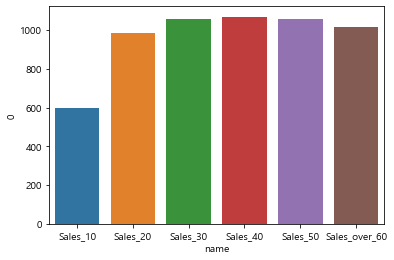

In [20]:
sns.barplot(data = age_sales_bar, x = age_sales_bar.index , y = 0)
plt.show()

- 30대 40대 50대가 여러 다양한 상권에서 매출을 올리고 있습니다

# 나이대별 매출량 확인하기

In [21]:
city

,City,Sales_per_quarter,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
606,강남대로118길,23.0,0.0,0.0,23.0,0.0,0.0,0.0
1355,강남대로23길,60.0,0.0,0.0,0.0,12.0,36.0,12.0
1356,강남대로23길,537.0,0.0,0.0,0.0,358.0,179.0,0.0
1357,강남대로34길,19.0,0.0,0.0,0.0,19.0,0.0,0.0
1358,강남대로8길,208.0,0.0,0.0,0.0,0.0,0.0,208.0
...,...,...,...,...,...,...,...,...
188891,강남대로34길,2036.0,0.0,0.0,0.0,0.0,1097.0,470.0
188911,강남대로118길,93.0,0.0,0.0,13.0,80.0,0.0,0.0
188912,강남대로118길,1378.0,0.0,289.0,271.0,246.0,316.0,256.0
188913,강남대로136길,128.0,0.0,0.0,0.0,128.0,0.0,0.0


In [22]:
city4 = city.drop(labels = ['Sales_per_quarter','City'], axis=1)

In [23]:
city4

,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
606,0.0,0.0,23.0,0.0,0.0,0.0
1355,0.0,0.0,0.0,12.0,36.0,12.0
1356,0.0,0.0,0.0,358.0,179.0,0.0
1357,0.0,0.0,0.0,19.0,0.0,0.0
1358,0.0,0.0,0.0,0.0,0.0,208.0
...,...,...,...,...,...,...
188891,0.0,0.0,0.0,0.0,1097.0,470.0
188911,0.0,0.0,13.0,80.0,0.0,0.0
188912,0.0,289.0,271.0,246.0,316.0,256.0
188913,0.0,0.0,0.0,128.0,0.0,0.0


In [24]:
#기술통계량

city_agg = city4.agg(['mean', 'std', 'min', 'max'])
city_agg.index.rename('mean', inplace = True)

In [25]:
city_agg

,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
mean,,,,,,
mean,460.643872,11559.351687,13305.870337,9529.473357,7193.358792,5343.358792
std,1772.458882,37676.205387,40366.178342,26228.105257,19402.891172,18451.213148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25463.000000,365799.000000,351726.000000,205891.000000,209085.000000,274251.000000


In [26]:
city5 = city4.sum(axis=0)
city5 = city5

In [27]:
city5 = pd.DataFrame(city5)

In [28]:
city5

,0
Sales_10,518685.0
Sales_20,13015830.0
Sales_30,14982410.0
Sales_40,10730187.0
Sales_50,8099722.0
Sales_over_60,6016622.0


<AxesSubplot:ylabel='0'>

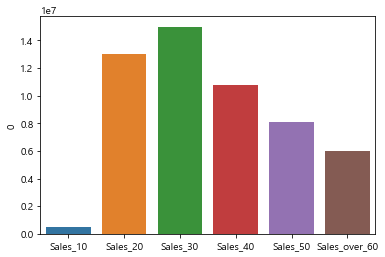

In [30]:
sns.barplot(data = city5 , x = city5.index , y = 0)

- 30대가 상권 매출에 가장 높은 기여를 보입니다

# P-Value

In [31]:
city1

,Sales_per_quarter,Sales_10,Sales_20,Sales_30,Sales_40,Sales_50,Sales_over_60
City,,,,,,,
강남대로118길,23,0,0,23,0,0,0
강남대로23길,60,0,0,0,12,36,12
강남대로23길,537,0,0,0,358,179,0
강남대로34길,19,0,0,0,19,0,0
강남대로8길,208,0,0,0,0,0,208
...,...,...,...,...,...,...,...
강남대로34길,2036,0,0,0,0,1097,470
강남대로118길,93,0,0,13,80,0,0
강남대로118길,1378,0,289,271,246,316,256


In [32]:
target = city1['Sales_per_quarter']
city1["log_count"] = np.log(target+1)
feature_names = list(city1)
df_train = city1[feature_names]
city_df = pd.concat((df_train,city1))

In [34]:
# 검증하기 위해 data를 train과 validation으로 나누기
new_train = city_df[:city1.shape[0]]
new_test = city_df[city1.shape[0]:]
target = city1['log_count']

In [35]:
import statsmodels.api as sm
model = sm.OLS(target.values, new_train.astype(float))
re = model.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.343e+31
Date:                Sat, 28 May 2022   Prob (F-statistic):                        0.00
Time:                        14:19:16   Log-Likelihood:                          34022.
No. Observations:                1126   AIC:                                 -6.803e+04
Df Residuals:                    1118   BIC:                                 -6.799e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Sales_per_quarter  5.489e-19   7.05e-20      7.782      0.000     4.1e-19    6.87e-19
Sales_10          -1.347e-17   8.22e-19    -16.379      0.000   -1.51e-17   -1.19e-17
Sales_20           1.057e-18   1.48e-19      7.123      0.000    7.66e-19    1.35e-18
Sales_30           -2.86e-18   2.34e-19    -12.237      0.000   -3.32e-18    -2.4e-18
Sales_40           3.774e-18   2.31e-19     16.311      0.000    3.32e-18    4.23e-18
Sales_50          -5.367e-18   3.35e-19    -16.041      0.000   -6.02e-18   -4.71e-18
Sales_over_60        6.2e-19   1.61e-19      3.850      0.000    3.04e-19    9.36e-19
log_count             1.0000   7.25e-17   1.38e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1347.400   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190100.804
Skew:                           5.964   Prob(JB):                         0.00
Kurtosis:                      65.527   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""